# 001_EVI vs YIELD CORRELATION SEASONAL

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
import scipy
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter
import statsmodels.formula.api as sm
import copy
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms
import sklearn
from math import sqrt
from functools import reduce
import numpy as np
#import ee
#import geemap
import geopandas as gpd
import rioxarray as rxr
import rasterstats as rs
from rasterio.plot import show
import rasterio

%matplotlib inline

In [2]:
eviPath = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/monthlyCompositeEVI_2017.tif'
evi = rxr.open_rasterio(eviPath)


points = gpd.read_file('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg')
points

points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/EVI_2017_intersected_monthly.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
#grouped

# IRRIGATED EVI MEAN

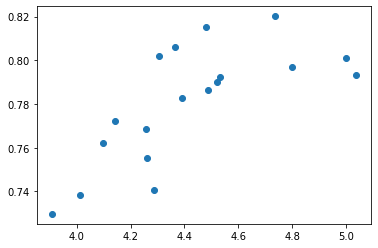

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,0.070080,0.033808,0.712907,-0.215854
EVI2017_1,0.070080,1.000000,0.311983,-0.051125,-0.392363
EVI2017_2,0.033808,0.311983,1.000000,-0.174338,0.477133
EVI2017_3,0.712907,-0.051125,-0.174338,1.000000,-0.294708
EVI2017_4,-0.215854,-0.392363,0.477133,-0.294708,1.000000


In [44]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_MEAN.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[grouped['Class']=='Irrigated Rice']


month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='irri') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
'''
from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])

'''
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['EVI2017_3'])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()

# IRRIGATED EVI SUM

In [47]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_SUM.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
rfGRP = grouped.loc[grouped['Class']=='Irrigated Rice']


month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='irri') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
'''
from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])


#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
#plt.scatter(merged['value'], merged[month])
#plt.show()
'''
df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()
rfGRP

,Class,ADM3_EN,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
0,Irrigated Rice,Anilao,2.241700,1.929700,2.189200,2.151300
1,Irrigated Rice,Banate,1.948150,1.825850,2.265650,2.237067
2,Irrigated Rice,Barotac Nuevo,2.068459,1.761882,2.406277,2.050164
3,Irrigated Rice,Barotac Viejo,2.029310,1.851029,2.215376,2.271981
4,Irrigated Rice,Dingle,2.106656,1.992911,2.359811,2.150767
5,Irrigated Rice,Dumangas,2.116121,1.878311,2.390271,2.056126
6,Irrigated Rice,Iloilo City,2.060033,1.872283,2.222083,2.126483
7,Irrigated Rice,Janiuay,2.109900,2.064900,2.377700,2.269400
8,Irrigated Rice,Leganes,2.139531,1.843338,2.418885,1.991338
9,Irrigated Rice,Mina,1.959667,2.026325,2.370083,2.353792


# RAINFED EVI MEAN

In [17]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_MEAN.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()


month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
'''
from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])


#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
#plt.scatter(merged['value'], merged[month])
#plt.show()
'''
df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,-0.111675,-0.151265,0.065172,-0.181907
EVI2017_1,-0.111675,1.000000,0.801297,0.581789,0.624457
EVI2017_2,-0.151265,0.801297,1.000000,0.549578,0.757888
EVI2017_3,0.065172,0.581789,0.549578,1.000000,0.401757
EVI2017_4,-0.181907,0.624457,0.757888,0.401757,1.000000


# RAINFED EVI SUM

In [18]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_SUM.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()


month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')
rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
'''
from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])


#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
#plt.scatter(merged['value'], merged[month])
#plt.show()
'''
df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,-0.101728,-0.149008,0.056129,-0.180109
EVI2017_1,-0.101728,1.000000,0.832536,0.588894,0.618154
EVI2017_2,-0.149008,0.832536,1.000000,0.567958,0.762349
EVI2017_3,0.056129,0.588894,0.567958,1.000000,0.460014
EVI2017_4,-0.180109,0.618154,0.762349,0.460014,1.000000


# RAINFED ADJUSTED FOR BETTER MUNICIPALITIES (SUM)

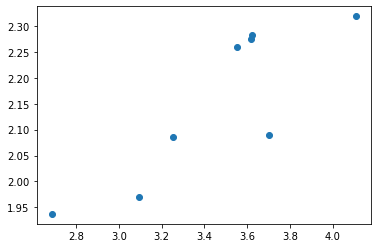

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,0.852912,0.660845,0.772692,0.604461
EVI2017_1,0.852912,1.000000,0.914604,0.908782,0.867148
EVI2017_2,0.660845,0.914604,1.000000,0.880340,0.954532
EVI2017_3,0.772692,0.908782,0.880340,1.000000,0.806500
EVI2017_4,0.604461,0.867148,0.954532,0.806500,1.000000


In [49]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_SUM.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
pregrp = grouped.loc[grouped['Class']=='Rain-fed Rice']

rfGRP = pregrp.loc[pregrp['ADM3_EN'].isin([
'Carles',
'Calinog',
'Estancia',
'Lambunao',
'Cabatuan',
'Duenas',
'Santa Barbara',
#'Bingawan',
'Maasin',
'Badiangan'
])]

month = 'EVI2017_1'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()  

# RAINFED ADJUSTED FOR BETTER MUNICIPALITIES (MEAN)

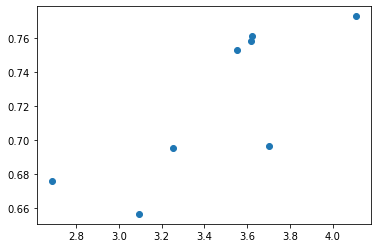

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,0.783546,0.614731,0.759851,0.219408
EVI2017_1,0.783546,1.000000,0.899814,0.859483,0.693763
EVI2017_2,0.614731,0.899814,1.000000,0.857520,0.762436
EVI2017_3,0.759851,0.859483,0.857520,1.000000,0.470093
EVI2017_4,0.219408,0.693763,0.762436,0.470093,1.000000


In [48]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/points_intersected_seasonalCompositeNDVI_2017_MEAN.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
pregrp = grouped.loc[grouped['Class']=='Rain-fed Rice']

rfGRP = pregrp.loc[pregrp['ADM3_EN'].isin([
'Carles',
'Calinog',
'Estancia',
'Lambunao',
'Cabatuan',
'Duenas',
'Santa Barbara',
#'Bingawan',
'Maasin',
'Badiangan'
])]

month = 'EVI2017_1'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_new.csv')


rfDO = dataOfficial.loc[(dataOfficial['ecosystem']=='rf') & (dataOfficial['year']==2017)]
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


#rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
#mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
#mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])
#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)

plt.scatter(merged['value'], merged[month])
plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()  

In [56]:
points = '/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/EVI_2017_intersected_seasonalCompositeEVI_2017_SUM.gpkg'
points = gpd.read_file(points)
grouped = points.groupby(['Class','ADM3_EN']).mean().reset_index()
grouped

month = 'EVI2017_2'

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')

rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfGRP = grouped.loc[grouped['ADM3_EN'].isin([
'Carles',
'Calinog',
'Estancia',
'Lambunao',
'Cabatuan',
'Duenas',
'Santa Barbara',
'Bingawan',
'Maasin',
'Badiangan'
])]


rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')
merged[month]

from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged[month], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged[month])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged[month])


#print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
#plt.scatter(merged['value'], merged[month])
#plt.show()

df = pd.DataFrame(merged,columns=['value','EVI2017_1',	'EVI2017_2',	'EVI2017_3',	'EVI2017_4'])
df.corr()

,value,EVI2017_1,EVI2017_2,EVI2017_3,EVI2017_4
value,1.000000,0.858495,0.579419,0.587101,0.547876
EVI2017_1,0.858495,1.000000,0.793418,0.880331,0.426983
EVI2017_2,0.579419,0.793418,1.000000,0.788614,0.728219
EVI2017_3,0.587101,0.880331,0.788614,1.000000,0.332384
EVI2017_4,0.547876,0.426983,0.728219,0.332384,1.000000


In [ ]:
District I
'Iloilo City' ,
'San Joaquin',
'Miagao',
'Igbaras',
'Tubungan',
'Guimbal',
'Tigbauan', 
'Oton' ,

District II
'Leon' ,
'Alimodian',
'San Miguel',
'Santa Barbara',
'Pavia',
'Leganes',
'Zarraga',
'New Lucena',

District III
'Cabatuan',
'Maasin',
'Pototan',
'Mina',
'Janiuay',
'Badiangan', 
'Lambunao',
'Calinog',
'Bingawan', 

District IV
'Passi City',
'San Enrique', 
'Dingle',
'Duenas',
'Dumangas',
'Barotac Nuevo',
'Anilao',
'Banate' ,

District V
'Barotac Viejo',
'San Rafael',
'Sara',
'Ajuy',
'Lemery',
'San Dionisio',
'Concepcion',
'Balasan',
'Batad' ,
'Estancia',
'Carles',


TOP MUNIS RAINFED
'Lambunao',
'Passi City',
'Calinog',
'Santa Barbara',
'Cabatuan',
'Sara',
'Balasan',
'Dueñas',
'Leon',
'Janiuay'

## MISC CODES

In [ ]:
rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=1,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')

from sklearn.metrics import mean_squared_error

rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=2,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:

rstats = rs.zonal_stats('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/geospatial_layers/intersect_DS_points.gpkg', 
                        eviPath, 
                        stats='mean', 
                        band=3,
                        geojson_out=True)
rstats = gpd.GeoDataFrame.from_features(rstats)


grouped = rstats.groupby(['Class','ADM3_EN']).mean().reset_index()

dataOfficial = pd.read_csv('/Users/delatorredm/OneDrive - The University of Auckland/Ch4_Climate_Impacts/iloilo_rice_data_cleaned_imputed_2017.csv')


rfGRP = grouped.loc[grouped['Class']=='Rain-fed Rice']
rfDO = dataOfficial.loc[dataOfficial['ecosystem']=='rf']
merged = pd.merge(rfDO, rfGRP, left_on='muni', right_on='ADM3_EN')


rmse = sklearn.metrics.mean_squared_error(merged['value'], merged['mean'], squared=False)
mae = sklearn.metrics.mean_absolute_error(merged['value'], merged['mean'])
mape = sklearn.metrics.mean_absolute_percentage_error(merged['value'], merged['mean'])


print('RMSE =', rmse, 'MAE =', mae, 'MAPE =', mape)
plt.scatter(merged['value'], merged['mean'])
plt.show()

In [ ]:
sns.pairplot(cormap);
